In [1]:
#importing required libararies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools
import numpy as np

In [2]:
#Importing the dataset
from google.colab import files
uploaded=files.upload()

Layoffs_df = pd.read_csv("layoffs_data.csv")
Layoffs_df.head()

Saving layoffs_data.csv to layoffs_data.csv


,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown


In [3]:
# Check the dimensions of the dataframe
print(f"Rows: {Layoffs_df.shape[0]}, Columns: {Layoffs_df.shape[1]}")

# Display the column names
print("Columns:", Layoffs_df.columns)

Rows: 3642, Columns: 12
Columns: Index(['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Date',
       'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'Percentage', 'List_of_Employees_Laid_Off'],
      dtype='object')


In [4]:
#Data Cleaning
# Check for missing values in each column
print(Layoffs_df.isnull().sum())

Company                          0
Location_HQ                      0
Industry                         0
Laid_Off_Count                1253
Date                             0
Source                           0
Funds_Raised                   390
Stage                            0
Date_Added                       0
Country                          0
Percentage                    1300
List_of_Employees_Laid_Off       0
dtype: int64


In [5]:
# Check if there are any duplicate rows
print(Layoffs_df.duplicated().sum())

0


In [6]:
# After dropping the null values
# Drop rows with any missing values
Layoffs_df = Layoffs_df.dropna()
# Display the new shape of the dataframe
print("New shape after dropping rows with missing values:", Layoffs_df.shape)

New shape after dropping rows with missing values: (1526, 12)


In [7]:
# Check for missing values in each column
print(Layoffs_df.isnull().sum())

Company                       0
Location_HQ                   0
Industry                      0
Laid_Off_Count                0
Date                          0
Source                        0
Funds_Raised                  0
Stage                         0
Date_Added                    0
Country                       0
Percentage                    0
List_of_Employees_Laid_Off    0
dtype: int64


In [8]:
Layoffs_df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.2,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.3,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.1,Unknown
6,OrCam,Jerusalem,Healthcare,100.0,2024-06-03,https://www.calcalistech.com/ctechnews/article...,86.0,Unknown,2024-06-04 03:47:34,Israel,0.5,Unknown
13,Walnut,New York City,Sales,15.0,2024-05-29,https://www.calcalistech.com/ctechnews/article...,56.0,Series B,2024-05-31 10:49:24,United States,0.2,Unknown


In [9]:
# Information and Statistical summary of the Dataset
print(Layoffs_df.info())
print(Layoffs_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1526 entries, 1 to 3640
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     1526 non-null   object 
 1   Location_HQ                 1526 non-null   object 
 2   Industry                    1526 non-null   object 
 3   Laid_Off_Count              1526 non-null   float64
 4   Date                        1526 non-null   object 
 5   Source                      1526 non-null   object 
 6   Funds_Raised                1526 non-null   float64
 7   Stage                       1526 non-null   object 
 8   Date_Added                  1526 non-null   object 
 9   Country                     1526 non-null   object 
 10  Percentage                  1526 non-null   float64
 11  List_of_Employees_Laid_Off  1526 non-null   object 
dtypes: float64(3), object(9)
memory usage: 187.3+ KB
None
       Laid_Off_Count   Funds_Raised   Pe


 Industry wise Layoff Counts:
Industry
Transportation    50584.0
Retail            49454.0
Other             47341.0
Consumer          44626.0
Finance           31545.0
Food              31122.0
Real Estate       14831.0
Healthcare        14677.0
Sales             14346.0
Travel            13313.0
Infrastructure    11165.0
Hardware          10920.0
Crypto            10581.0
Education          9126.0
Fitness            8728.0
Marketing          7806.0
Security           7392.0
HR                 6674.0
Media              6571.0
Data               4518.0
Logistics          4481.0
Recruiting         4342.0
Construction       3703.0
Support            2577.0
Energy             2027.0
Product            1581.0
Aerospace           813.0
Manufacturing       790.0
Legal               656.0
AI                  182.0
Unknown              35.0
Name: Laid_Off_Count, dtype: float64


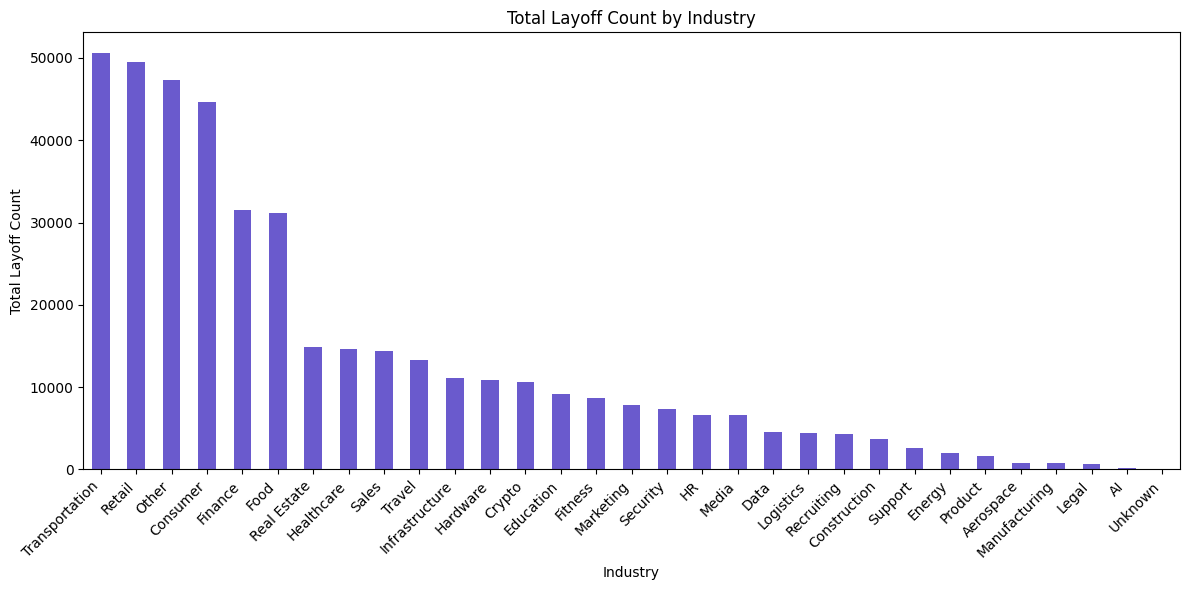

In [10]:
#Layoff Distribution across IT Industries
Industry_layoff_counts = Layoffs_df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False)
print("\n Industry wise Layoff Counts:")
print(Industry_layoff_counts)
#Plotting the Graphs
plt.figure(figsize=(12, 6))
Industry_layoff_counts.plot(kind='bar', color='slateblue')
plt.title('Total Layoff Count by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Layoff Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 Country wise Layoff Counts:
Country
United States     299585.0
India              27537.0
Germany            22793.0
United Kingdom     12638.0
Sweden             12442.0
Canada              8312.0
Brazil              6929.0
Singapore           5090.0
Israel              4515.0
Indonesia           2721.0
Name: Laid_Off_Count, dtype: float64


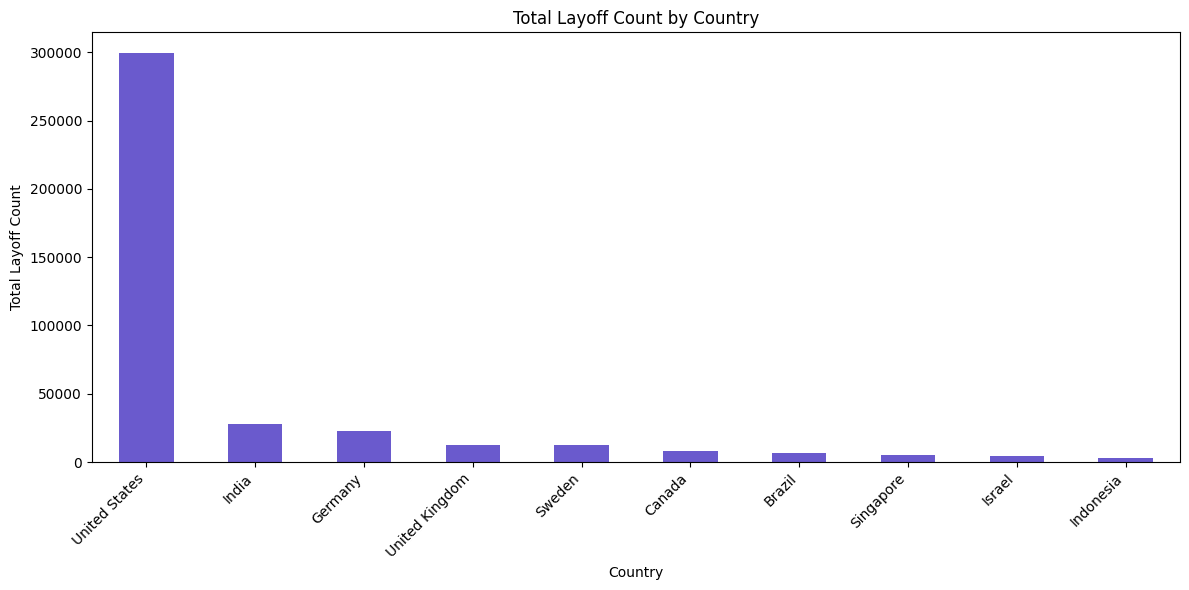

In [11]:
#Layoff Distribution across Countries
# Grouping data by 'Country' and summing up the 'Laid_Off_Count' for each country
# Sorting the results in descending order and selecting the top 10 countries
Country_layoff_counts = Layoffs_df.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
print("\n Country wise Layoff Counts:")
print(Country_layoff_counts)
Country_layoff_counts.plot(kind='bar', color='slateblue')
plt.title('Total Layoff Count by Country')
plt.xlabel('Country')
plt.ylabel('Total Layoff Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


HQ Location-wise Layoff Counts:
Location_HQ
SF Bay Area      142528.0
Seattle           37617.0
New York City     26573.0
Bengaluru         19487.0
Austin            18618.0
Boston            13362.0
Stockholm         12515.0
London            12462.0
Berlin            11524.0
Walldorf          11000.0
Name: Laid_Off_Count, dtype: float64


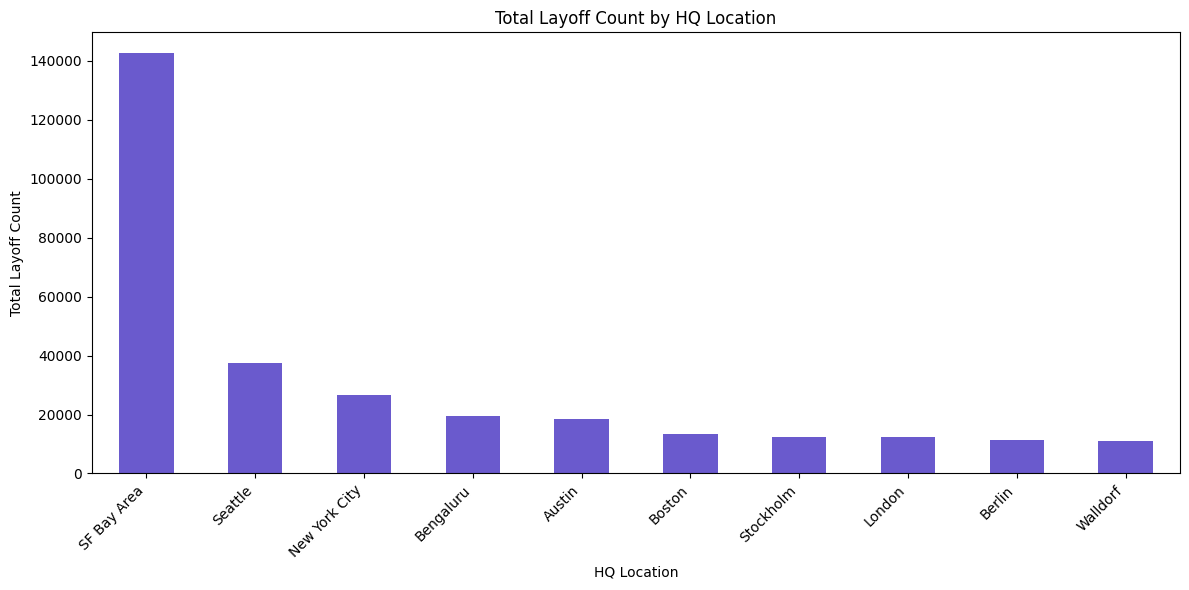

In [12]:
# Grouping data by 'Location_HQ' and summing up the 'Laid_Off_Count' for each location
# Sorting the results in descending order
Location_layoff_counts = Layoffs_df.groupby('Location_HQ')['Laid_Off_Count'].sum().sort_values(ascending=False).head(10)

# Printing the layoff counts by HQ location for reference
print("\nHQ Location-wise Layoff Counts:")
print(Location_layoff_counts)

# Setting the figure size for the plot
plt.figure(figsize=(12, 6))

# Plotting a bar chart for layoff counts by HQ location
Location_layoff_counts.plot(kind='bar', color='slateblue')

# Adding a title to the chart
plt.title('Total Layoff Count by HQ Location')
plt.xlabel('HQ Location')
plt.ylabel('Total Layoff Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 Company wise Layoff Counts:
Company
Amazon        18000.0
Tesla         14000.0
Google        12000.0
SAP           11000.0
Meta          11000.0
Salesforce    10700.0
Microsoft     10000.0
Ericsson       8500.0
Cisco          8350.0
Flink          8100.0
Name: Laid_Off_Count, dtype: float64


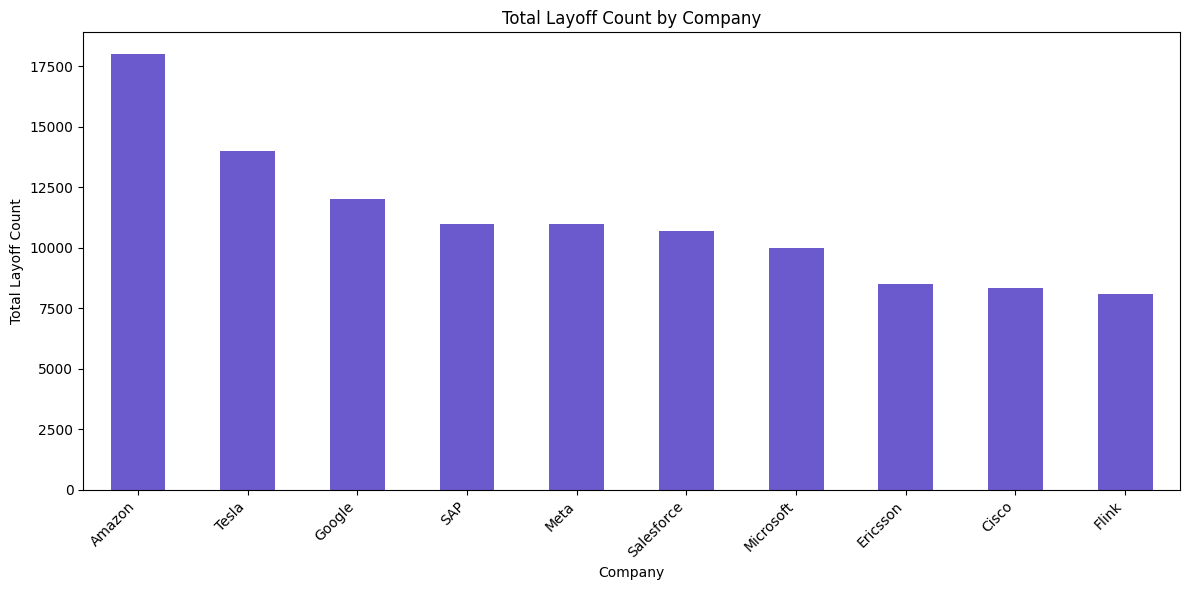

In [13]:
#Layoff Distribution across Companies
Company_layoff_counts = Layoffs_df.groupby('Company')['Laid_Off_Count'].sum().sort_values(ascending=False).head(10)
print("\n Company wise Layoff Counts:")
print(Company_layoff_counts)
#Plotting the Graphs
plt.figure(figsize=(12, 6))
Company_layoff_counts.plot(kind='bar', color='slateblue')
plt.title('Total Layoff Count by Company')
plt.xlabel('Company')
plt.ylabel('Total Layoff Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
#Coverting and Sorting Dates
Layoffs_df['Date'] = pd.to_datetime(Layoffs_df['Date'], errors='coerce')
Layoffs_df = Layoffs_df.sort_values('Date')
Layoffs_df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
3640,Tamara Mellon,Los Angeles,Retail,20.0,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,0.40,Unknown
3639,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,0.75,Unknown
3638,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,0.10,Unknown
3636,Help.com,Austin,Support,16.0,2020-03-16,LinkedIn,6.0,Seed,2020-04-16 06:36:06,United States,1.00,Unknown
3635,Inspirato,Denver,Travel,130.0,2020-03-16,https://businessden.com/2020/03/16/inspirato-c...,79.0,Series C,2020-03-31 14:45:56,United States,0.22,Unknown


In [15]:
#Data Preprocessing
data = Layoffs_df[['Date', 'Laid_Off_Count']]

In [16]:
data.reset_index()

,index,Date,Laid_Off_Count
0,3640,2020-03-12,20.0
1,3639,2020-03-13,6.0
2,3638,2020-03-13,8.0
3,3636,2020-03-16,16.0
4,3635,2020-03-16,130.0
...,...,...,...
1521,13,2024-05-29,15.0
1522,6,2024-06-03,100.0
1523,3,2024-06-05,30.0
1524,2,2024-06-05,30.0


In [17]:
# Group by the 'Date' column and sum the 'Laid_Off_Count' for each unique date. This is done to obtain the total layoff on that particular date.
data = data.groupby('Date').sum().reset_index()
# Display the resulting DataFrame
print(data)

          Date  Laid_Off_Count
0   2020-03-12            20.0
1   2020-03-13            14.0
2   2020-03-16           146.0
3   2020-03-18             4.0
4   2020-03-19            50.0
..         ...             ...
575 2024-05-23           105.0
576 2024-05-24           400.0
577 2024-05-29            15.0
578 2024-06-03           100.0
579 2024-06-05           160.0

[580 rows x 2 columns]


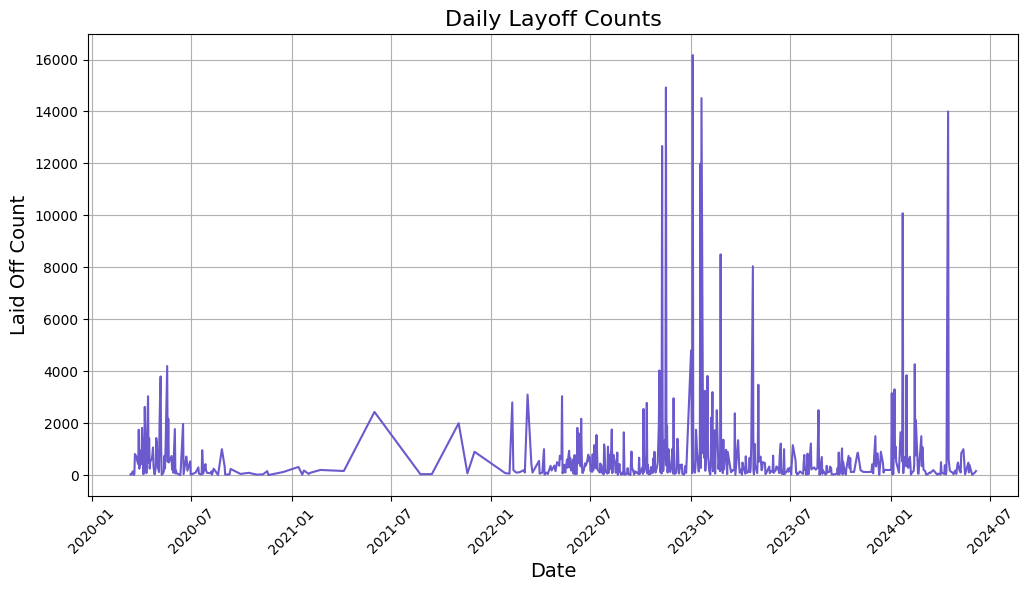

In [18]:
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(data['Date'], data['Laid_Off_Count'], color='slateblue', linestyle='-')
# Add a title and labels
plt.title('Daily Layoff Counts', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Laid Off Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [19]:
#Checking Stationarity using ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Laid_Off_Count'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    data['Differenced'] = data['Laid_Off_Count'].diff().dropna()

ADF Statistic: -4.651035153216101
p-value: 0.00010390341313241197


In [20]:
#The results of the Augmented Dickey-Fuller (ADF) test indicate an ADF Statistic of -4.651, which is highly negative, and a p-value of 0.0001, significantly below common significance levels like 0.05 or 0.01.
#These results provide strong evidence to reject the null hypothesis that the data has a unit root, suggesting that the time series is stationary and its statistical properties, such as mean and variance, remain constant over time.
# Our Layoff time series data appears to be STATIONARY.

In [21]:
# Preprocess: Convert date and aggregate data weekly to get the total weekly layoff
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Laid_Off_Count']].dropna()
data.set_index('Date', inplace=True)
data = data.resample('W').sum()  # Aggregate to weekly values to get the total weekly layoff

In [22]:
data

,Laid_Off_Count
Date,
2020-03-15,34.0
2020-03-22,1014.0
2020-03-29,4609.0
2020-04-05,5082.0
2020-04-12,5872.0
...,...
2024-05-12,1110.0
2024-05-19,1030.0
2024-05-26,985.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-1912.163, Time=0.52 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-1772.207, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1859.913, Time=0.17 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-1820.293, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1771.939, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-1913.127, Time=0.46 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-1842.555, Time=0.63 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-1912.301, Time=1.34 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-1909.664, Time=1.25 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-1844.614, Time=1.72 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-1910.313, Time=0.27 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-1909.726, Time=0.32 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1914.618, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-1843.458, Time=0.36 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1913.869, Time=0.13 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1914.012, Time=0.21 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-1911.505, Time=0.45 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1816.965, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-1845.697, Time=0.25 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-1911.867, Time=0.21 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-1911.591, Time=0.23 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 9.356 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=703.327, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=803.805, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=753.096, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=698.239, Time=0.11 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=801.809, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=699.974, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=699.976, Time=0.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=701.974, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=696.240, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=697.974, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=697.976, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0]             : AIC=751.100, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=699.974, Time=0.19 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.923 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Model Accuracy Metrics:
MAE: 1850.13
MAPE: 708.92%
RMSE: 3097.04


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Final Forecasted Values:
                 Date  Forecasted_Laid_Off_Count
2024-06-16 2024-06-16                 153.989987
2024-06-23 2024-06-23                 128.008115
2024-06-30 2024-06-30                 263.898072
2024-07-07 2024-07-07                 349.629229
2024-07-14 2024-07-14                4886.455905
2024-07-21 2024-07-21                 524.989765
2024-07-28 2024-07-28                1009.534497
2024-08-04 2024-08-04                 837.891198
2024-08-11 2024-08-11                 421.554799
2024-08-18 2024-08-18                 432.819862
2024-08-25 2024-08-25                  13.767264
2024-09-01 2024-09-01                 263.542715


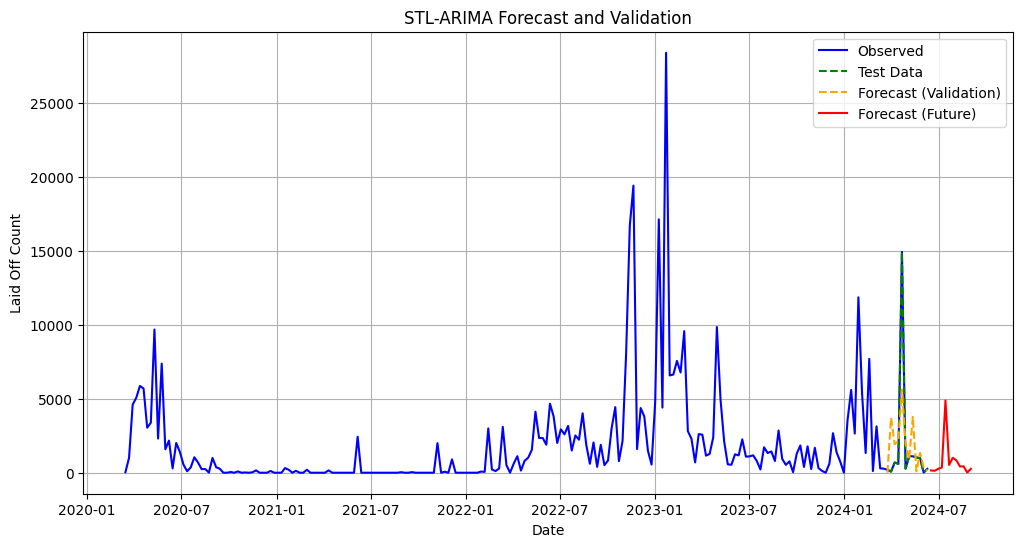

In [25]:
# STL ARIMA Model
!pip install pmdarima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Log transformation to stabilize variance
data['Laid_Off_Count_Log'] = np.log1p(data['Laid_Off_Count'])  # log(1 + x) for stability

# Split data into training and testing sets
train_data = data['Laid_Off_Count_Log'][:-12]  # Use all but the last 12 periods
test_data = data['Laid_Off_Count_Log'][-12:]   # Use the last 12 periods

# STL Decomposition on training data
stl = STL(train_data, seasonal=7)
result = stl.fit()

# Extract components from training data
trend = result.trend.dropna()
residual = result.resid.dropna()
seasonal = result.seasonal[-12:]

# Fit ARIMA to trend component
model_trend_auto = auto_arima(trend, seasonal=False, trace=True, suppress_warnings=True)
model_trend = ARIMA(trend, order=model_trend_auto.order).fit()
trend_forecast = model_trend.forecast(steps=12)

# Fit ARIMA to residual component
model_resid_auto = auto_arima(residual, seasonal=False, trace=True, suppress_warnings=True)
model_resid = ARIMA(residual, order=model_resid_auto.order).fit()
residual_forecast = model_resid.forecast(steps=12)

# Combine forecasts and exponentiate back to original scale
forecast_log = trend_forecast + seasonal.values + residual_forecast
forecast_values = np.expm1(forecast_log)  # Convert back to original scale
forecast_values = np.clip(forecast_values, a_min=0, a_max=None)  # Ensure non-negative values

# Back-transform test data
test_data_original = np.expm1(test_data)

# Calculate accuracy metrics
mae_STL = mean_absolute_error(test_data_original, forecast_values)
mape = np.mean(np.abs((test_data_original - forecast_values) / test_data_original)) * 100
rmse = np.sqrt(mean_squared_error(test_data_original, forecast_values))

print("Model Accuracy Metrics:")
print(f"MAE: {mae_STL:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")

# Forecast future values
future_steps = 12
future_dates = pd.date_range(data.index[-1], periods=future_steps + 1, freq='W')[1:]

# Fit model on entire dataset for final forecast
stl_full = STL(data['Laid_Off_Count_Log'], seasonal=7)
result_full = stl_full.fit()

trend_full = result_full.trend.dropna()
residual_full = result_full.resid.dropna()
seasonal_full = result_full.seasonal[-12:]

# Refit ARIMA models
model_trend_full = ARIMA(trend_full, order=model_trend_auto.order).fit()
model_resid_full = ARIMA(residual_full, order=model_resid_auto.order).fit()

trend_forecast_full = model_trend_full.forecast(steps=future_steps)
residual_forecast_full = model_resid_full.forecast(steps=future_steps)

# Combine components for final forecast
future_forecast_log = trend_forecast_full + seasonal_full.values + residual_forecast_full
future_forecast_values = np.expm1(future_forecast_log)
future_forecast_values = np.clip(future_forecast_values, a_min=0, a_max=None)

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Laid_Off_Count': future_forecast_values
})

print("Final Forecasted Values:")
print(forecast_df)

# Plot observed and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Laid_Off_Count'], label='Observed', color='blue')
plt.plot(test_data.index, np.expm1(test_data), label='Test Data', color='green', linestyle='--')
plt.plot(test_data.index, forecast_values, label='Forecast (Validation)', color='orange', linestyle='--')
plt.plot(future_dates, future_forecast_values, label='Forecast (Future)', color='red', linestyle='-')
plt.title('STL-ARIMA Forecast and Validation')
plt.xlabel('Date')
plt.ylabel('Laid Off Count')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4174.921, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4263.769, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4198.256, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4180.111, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4261.771, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4173.780, Time=0.36 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4179.331, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4194.546, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4175.609, Time=0.57 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4194.432, Time=0.09 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4173.210, Time=0.70 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=4171.980, Time=0.73 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4175.130, Time=0.50 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=4174.802, Time=0.38 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=4171.426, Time=0.96 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4169.804, Time=2.29 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=4171.869, Time=0.65 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=4174.748, Time=0.37 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=4173.043, Time=1.18 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=4167.182, Time=0.61 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.55 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=4171.225, Time=0.41 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=4171.315, Time=0.65 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0]             : AIC=4169.218, Time=0.57 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4172.964, Time=0.32 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=4172.372, Time=0.35 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=4170.043, Time=0.34 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0]             : AIC=4171.441, Time=0.44 sec

Best model:  ARIMA(3,1,3)(0,0,0)[0]          
Total fit time: 16.816 seconds
Optimal ARIMA order: (3, 1, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Accuracy Metrics:
MAE: 2368.81
MAPE: 1417.12%
RMSE: 3786.70


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Forecasted Values:
         Date  Forecasted_Laid_Off_Count
0  2024-06-16                -388.557296
1  2024-06-23                1915.114112
2  2024-06-30                 913.423646
3  2024-07-07                1626.986415
4  2024-07-14                1697.151348
5  2024-07-21                1150.631566
6  2024-07-28                2086.017126
7  2024-08-04                1009.132576
8  2024-08-11                2039.299215
9  2024-08-18                1227.448272
10 2024-08-25                1720.008181
11 2024-09-01                1582.519079


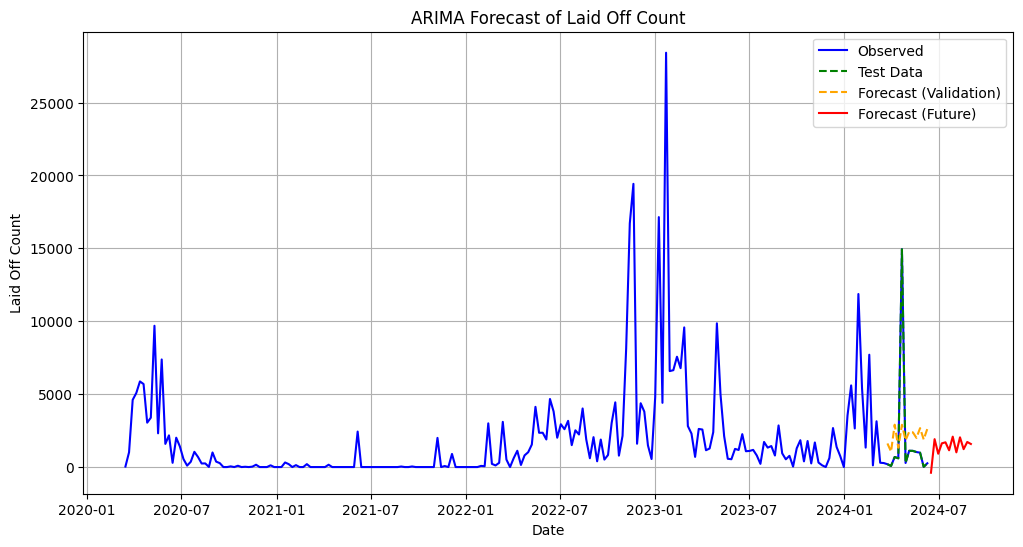

In [26]:
#ARIMA Model
# Auto ARIMA for optimal parameters
model_auto = auto_arima(data['Laid_Off_Count'], seasonal=False, trace=True, suppress_warnings=True)
print(f"Optimal ARIMA order: {model_auto.order}")

# Split data into training and testing sets
train_data = data['Laid_Off_Count'][:-12]  # Use all but the last 12 weeks
test_data = data['Laid_Off_Count'][-12:]   # Use the last 12 weeks

# Fit ARIMA with optimal parameters on training data
model_train = ARIMA(train_data, order=model_auto.order)
model_fit_train = model_train.fit()

# Forecast on the test data period
forecast_steps = 12  # Number of steps to forecast
forecast_test = model_fit_train.forecast(steps=forecast_steps)

# Calculate accuracy metrics
mae = mean_absolute_error(test_data, forecast_test)
mape = np.mean(np.abs((test_data - forecast_test) / test_data)) * 100
rmse = np.sqrt(mean_squared_error(test_data, forecast_test))

print("Model Accuracy Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")

# Forecast future values using the entire dataset
model_full = ARIMA(data['Laid_Off_Count'], order=model_auto.order)
model_fit_full = model_full.fit()
forecast_future = model_fit_full.forecast(steps=forecast_steps)

# Prepare future dates
forecast_dates = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Laid_Off_Count': forecast_future.values
})

print("Forecasted Values:")
print(forecast_df)

# Plot observed, test forecast, and future forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Laid_Off_Count'], label='Observed', color='blue')
plt.plot(test_data.index, test_data, label='Test Data', color='green', linestyle='--')
plt.plot(test_data.index, forecast_test, label='Forecast (Validation)', color='orange', linestyle='--')
plt.plot(forecast_dates, forecast_future, label='Forecast (Future)', color='red', linestyle='-')
plt.title('ARIMA Forecast of Laid Off Count')
plt.xlabel('Date')
plt.ylabel('Laid Off Count')
plt.legend()
plt.grid()
plt.show()

Model Accuracy Metrics:
MAE: 2756.12
MAPE: 1086.17%
RMSE: 3786.65
Forecasted Values:
         Date  Forecasted_Laid_Off_Count
0  2024-06-16                 685.388008
1  2024-06-23                4251.942374
2  2024-06-30                2047.953744
3  2024-07-07                  24.507451
4  2024-07-14                 731.977572
5  2024-07-21                2314.271438
6  2024-07-28                4518.268949
7  2024-08-04                1474.353083
8  2024-08-11                1098.070636
9  2024-08-18                1763.579681
10 2024-08-25                2735.278777
11 2024-09-01                1714.854702


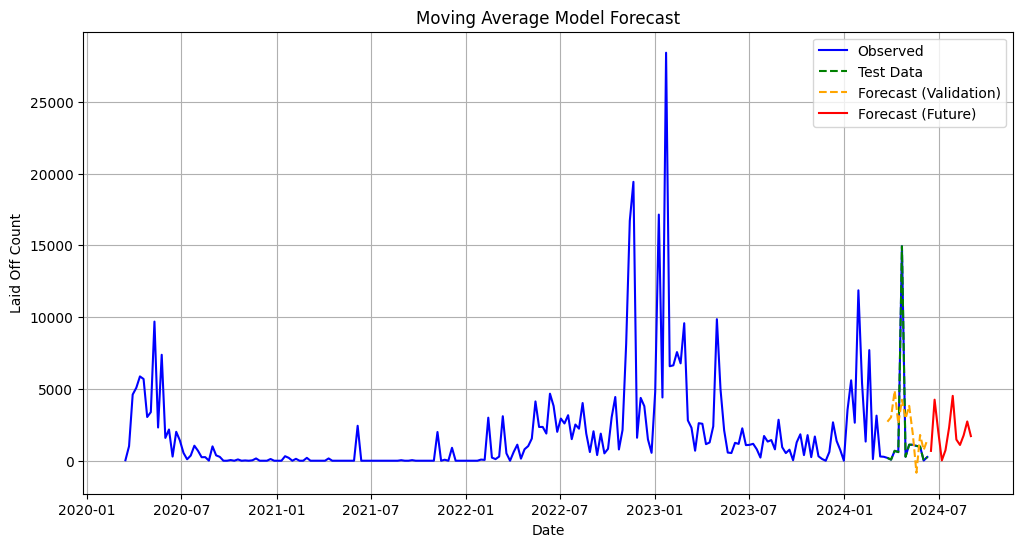

In [27]:
#MOVING AVERAGE Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data into training and testing sets
train_data = data['Laid_Off_Count'][:-12]  # Use all but the last 12 weeks
test_data = data['Laid_Off_Count'][-12:]   # Use the last 12 weeks

# Fit a Moving Average (MA) model (order=(0, 0, 14)) on training data
model_ma = ARIMA(train_data, order=(0, 0, 14))
model_ma_fit = model_ma.fit()

# Forecast on the test data period
forecast_steps = 12
forecast_test = model_ma_fit.forecast(steps=forecast_steps)

# Calculate accuracy metrics
mae = mean_absolute_error(test_data, forecast_test)
mape = np.mean(np.abs((test_data - forecast_test) / test_data)) * 100
rmse = np.sqrt(mean_squared_error(test_data, forecast_test))

print("Model Accuracy Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")

# Forecast future values using the entire dataset
model_ma_full = ARIMA(data['Laid_Off_Count'], order=(0, 0, 14))
model_ma_fit_full = model_ma_full.fit()
forecast_future = model_ma_fit_full.forecast(steps=forecast_steps)

# Generate future dates for the forecast
forecast_dates = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Laid_Off_Count': forecast_future.values
})

# Print forecasted values
print("Forecasted Values:")
print(forecast_df)

# Plot observed, test forecast, and future forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Laid_Off_Count'], label='Observed', color='blue')
plt.plot(test_data.index, test_data, label='Test Data', color='green', linestyle='--')
plt.plot(test_data.index, forecast_test, label='Forecast (Validation)', color='orange', linestyle='--')
plt.plot(forecast_dates, forecast_future, label='Forecast (Future)', color='red', linestyle='-')
plt.title('Moving Average Model Forecast')
plt.xlabel('Date')
plt.ylabel('Laid Off Count')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Model Accuracy Metrics:
MAE: 2263.34
MAPE: 1427.34%
RMSE: 3746.66
Forecasted Values:
                 Date  Forecasted_Laid_Off_Count
2024-06-16 2024-06-16                 585.911299
2024-06-23 2024-06-23                 845.917815
2024-06-30 2024-06-30                2413.176906
2024-07-07 2024-07-07                 501.713940
2024-07-14 2024-07-14                1798.001400
2024-07-21 2024-07-21                 418.021602
2024-07-28 2024-07-28                 870.627616
2024-08-04 2024-08-04                 240.409035
2024-08-11 2024-08-11                 799.163825
2024-08-18 2024-08-18                 625.914350
2024-08-25 2024-08-25                 506.841337
2024-09-01 2024-09-01                 441.655227


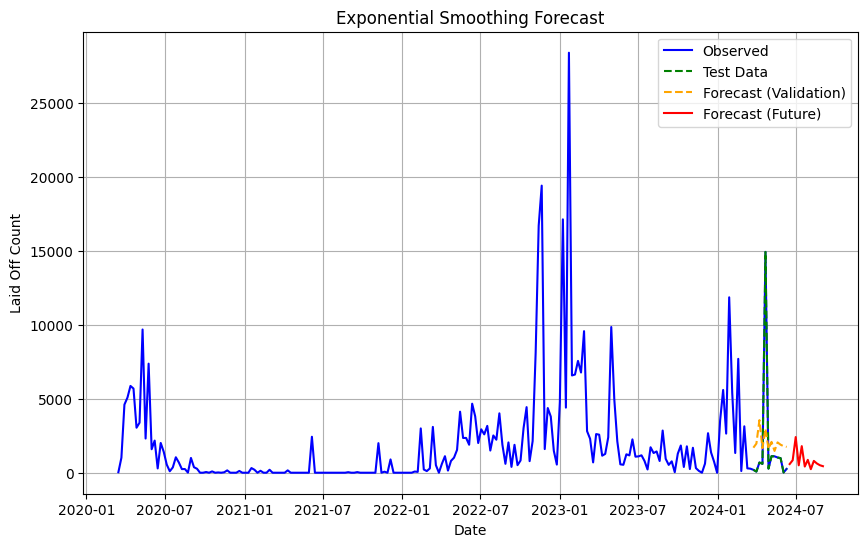

In [28]:
# EXPONENTIAL SMOOTHING MODEL
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split data into training and testing sets
train_data = data['Laid_Off_Count'][:-12]  # Use all but the last 12 weeks
test_data = data['Laid_Off_Count'][-12:]   # Use the last 12 weeks

# Fit Exponential Smoothing Model on training data
# Components: trend='add' for additive trend, seasonal='add' for additive seasonality
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast on the test data period
forecast_steps = 12
forecast_test = model_fit.forecast(steps=forecast_steps)

# Calculate accuracy metrics
mae = mean_absolute_error(test_data, forecast_test)
mape = np.mean(np.abs((test_data - forecast_test) / test_data)) * 100
rmse = np.sqrt(mean_squared_error(test_data, forecast_test))

print("Model Accuracy Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")

# Forecast future values using the entire dataset
model_full = ExponentialSmoothing(data['Laid_Off_Count'], trend='add', seasonal='add', seasonal_periods=12)
model_fit_full = model_full.fit()
forecast_future = model_fit_full.forecast(steps=forecast_steps)

# Create forecast dates
forecast_dates = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Combine future forecast into DataFrame for clarity
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Laid_Off_Count': forecast_future})
print("Forecasted Values:")
print(forecast_df)

# Plot Observed Data, Test Forecast, and Future Forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Laid_Off_Count'], label='Observed', color='blue')
plt.plot(test_data.index, test_data, label='Test Data', color='green', linestyle='--')
plt.plot(test_data.index, forecast_test, label='Forecast (Validation)', color='orange', linestyle='--')
plt.plot(forecast_dates, forecast_future, label='Forecast (Future)', color='red', linestyle='-')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Laid Off Count')
plt.legend()
plt.grid()
plt.show()

Model Accuracy Metrics:
MAE: 2263.34
MAPE: 1427.34%
RMSE: 3746.66
Forecasted Values:
                 Date  Forecasted_Laid_Off_Count
2024-06-16 2024-06-16                 620.608975
2024-06-23 2024-06-23                 894.478472
2024-06-30 2024-06-30                1102.088077
2024-07-07 2024-07-07                1147.690806
2024-07-14 2024-07-14                1298.899687
2024-07-21 2024-07-21                1221.245320
2024-07-28 2024-07-28                1269.855681
2024-08-04 2024-08-04                1311.664657
2024-08-11 2024-08-11                1360.687146
2024-08-18 2024-08-18                1428.157579
2024-08-25 2024-08-25                1449.361001
2024-09-01 2024-09-01                1505.721448


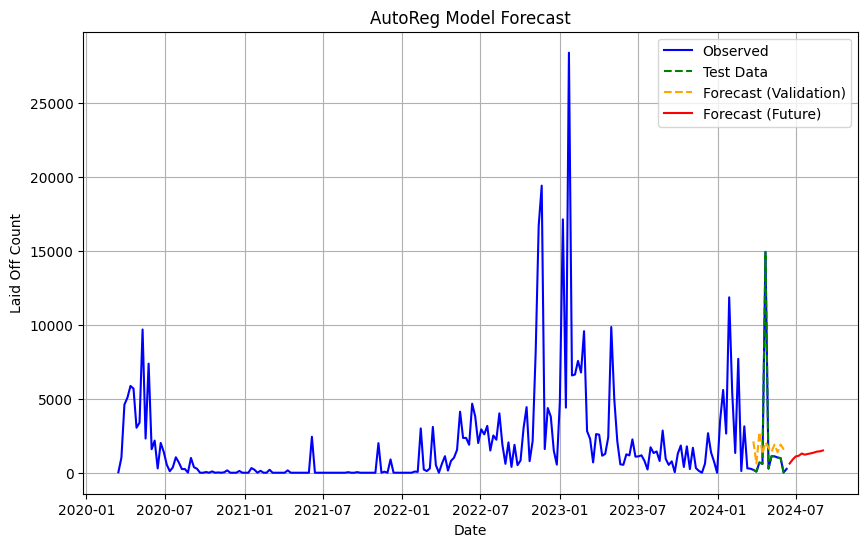

In [29]:
#AR Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data into training and testing sets
train_data = data['Laid_Off_Count'][:-12]  # Use all but the last 12 weeks
test_data_AR = data['Laid_Off_Count'][-12:]   # Use the last 12 weeks

# Fit the AutoReg model on training data
lag = 7  # You can adjust the lag based on your data analysis
model = AutoReg(train_data, lags=lag)
model_fitted = model.fit()

# Forecast on the test data period
forecast_steps = 12
forecast_test_AR = model_fitted.predict(start=len(train_data), end=len(train_data)+forecast_steps-1, dynamic=False)

# Calculate accuracy metrics
mae = mean_absolute_error(test_data_AR, forecast_test)
mape = np.mean(np.abs((test_data - forecast_test) / test_data_AR)) * 100
rmse = np.sqrt(mean_squared_error(test_data_AR, forecast_test))

print("Model Accuracy Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")

# Forecast future values using the entire dataset
model_full = AutoReg(data['Laid_Off_Count'], lags=lag)
model_fitted_full = model_full.fit()
forecast_future = model_fitted_full.predict(start=len(data), end=len(data)+forecast_steps-1, dynamic=False)

# Generate future dates for the forecast
forecast_dates = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Combine future forecast into DataFrame for clarity
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Laid_Off_Count': forecast_future})
print("Forecasted Values:")
print(forecast_df)

# Plot Observed Data, Test Forecast, and Future Forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Laid_Off_Count'], label='Observed', color='blue')
plt.plot(test_data_AR.index, test_data_AR, label='Test Data', color='green', linestyle='--')
plt.plot(test_data_AR.index, forecast_test_AR, label='Forecast (Validation)', color='orange', linestyle='--')
plt.plot(forecast_dates, forecast_future, label='Forecast (Future)', color='red', linestyle='-')
plt.title('AutoReg Model Forecast')
plt.xlabel('Date')
plt.ylabel('Laid Off Count')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0173
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0140 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148  
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0157 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0159  
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0149  
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082  
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119  
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0167 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━

<ipython-input-30-0b7ddc63789e>:65: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test_original - test_forecast) / y_test_original)) * 100


Model Accuracy Metrics:
MAE: 1914.64
MAPE: inf%
RMSE: 3110.56


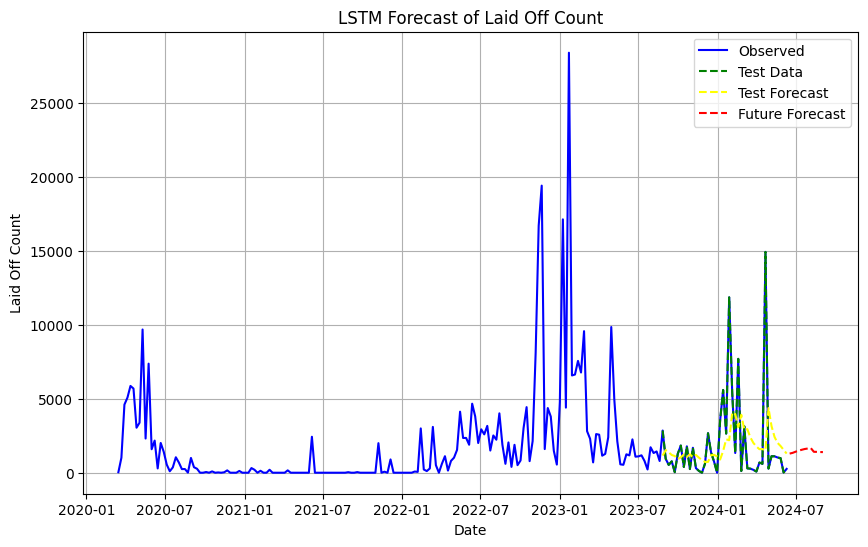

Forecasted Values:
         Date  Forecasted_Laid_Off_Count
0  2024-06-16                1295.014771
1  2024-06-23                1344.562500
2  2024-06-30                1425.057129
3  2024-07-07                1494.004028
4  2024-07-14                1553.260376
5  2024-07-21                1605.173828
6  2024-07-28                1637.992065
7  2024-08-04                1665.208008
8  2024-08-11                1416.050049
9  2024-08-18                1410.715332
10 2024-08-25                1399.844971
11 2024-09-01                1395.072388


In [30]:
#LSTM Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Laid_Off_Count']])

# Create sequences for LSTM
seq_length = 14
X, y = [], []
for i in range(len(data_scaled) - seq_length):
    X.append(data_scaled[i:i + seq_length])
    y.append(data_scaled[i + seq_length])

X, y = np.array(X), np.array(y)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Forecast future values
forecast_steps = 12
forecast = []
last_sequence = X_test[-1]  # Start with the last sequence from the test data

test_forecast = []  # Store test forecasts
for i in range(len(X_test)):
    pred = model.predict(X_test[i].reshape(1, seq_length, 1), verbose=0)
    test_forecast.append(pred[0, 0])

# Extend forecast into the future
for _ in range(forecast_steps):
    pred = model.predict(last_sequence.reshape(1, seq_length, 1), verbose=0)
    forecast.append(pred[0, 0])
    last_sequence = np.append(last_sequence[1:], pred).reshape(seq_length, 1)

# Inverse transform the forecast to the original scale
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
test_forecast = scaler.inverse_transform(np.array(test_forecast).reshape(-1, 1))

# Inverse transform the test data to the original scale
y_test_original = scaler.inverse_transform(y_test)

# Calculate accuracy metrics
mae = mean_absolute_error(y_test_original, test_forecast)
mape = np.mean(np.abs((y_test_original - test_forecast) / y_test_original)) * 100
rmse = np.sqrt(mean_squared_error(y_test_original, test_forecast))

print("Model Accuracy Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")

# Generate forecast dates
forecast_dates = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='W')[1:]
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Laid_Off_Count': forecast.flatten()})

# Plot observed data, test data, test forecast, and future forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Laid_Off_Count'], label='Observed', color='blue')
plt.plot(data.index[-len(y_test_original):], y_test_original, label='Test Data', color='green', linestyle='--')
plt.plot(data.index[-len(test_forecast):], test_forecast, label='Test Forecast', color='yellow', linestyle='--')
plt.plot(forecast_dates, forecast, label='Future Forecast', color='red', linestyle='--')
plt.title('LSTM Forecast of Laid Off Count')
plt.xlabel('Date')
plt.ylabel('Laid Off Count')
plt.legend()
plt.grid()
plt.show()

# Print forecasted values
print("Forecasted Values:")
print(forecast_df)

In [31]:
# MODELS USED
# Moving Average (MA) Model: The Moving Average (MA) model is a statistical approach for time series analysis that captures the dependency between an observation and residual errors from previous observations. It smooths short-term fluctuations to identify underlying trends by averaging out noise. MA models are particularly useful for identifying patterns in stationary time series data and are effective in short-term forecasting.
# Autoregressive (AR) Model: The Autoregressive (AR) model predicts future values in a time series based on its own past values. It assumes that the current observation is influenced by a linear combination of prior observations. AR models are ideal for datasets where past behavior has a strong influence on future trends, often indicated by significant autocorrelation.
# Exponential Smoothing: Exponential Smoothing is a forecasting method that assigns exponentially decreasing weights to past observations, giving more importance to recent data. It is used to model and predict time series with patterns such as level, trend, or seasonality.
# Long Short-Term Memory (LSTM): LSTM is a type of recurrent neural network designed to model complex time series data by capturing both short-term and long-term dependencies. It uses specialized memory cells and gates to selectively retain, forget, and output information.
# Autoregressive Integrated Moving Average (ARIMA): The ARIMA model is a comprehensive tool for analyzing and forecasting time series data. It combines autoregression, differencing, and moving average techniques to handle both stationary and non-stationary data. ARIMA is widely used for its flexibility and effectiveness in modeling diverse time series patterns.
# Seasonal-Trend Decomposition using Loess (STL) with ARIMA: STL-ARIMA is a hybrid approach that combines the decomposition of a time series into seasonal, trend, and residual components with ARIMA modeling. The decomposition isolates seasonal patterns and trends, allowing ARIMA to focus on modeling the residuals. This combination makes STL-ARIMA highly suitable for time series with strong seasonal variations.

In [32]:
# Accuracy Metric:
# Root Mean Squared Error (RMSE): It is a widely used metric for evaluating the accuracy of predictions in regression and time series models.
# It measures the average magnitude of error between predicted values and actual observations, expressing it in the same units as the data.
# RMSE is calculated as the square root of the mean of the squared differences between predictions and actual values.

In [33]:
#CONCLUSION: STL ARIMA has the least RSME among the other models and hence it is taken as the best model for forecasting layoffs.